# PROJECT 1

## Paulina Mostek
## Objective: Explore the Project 1 dataset using Python, and perform data cleaning using pandas.

# <u>Imports</u>
## Import libraries

In [28]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats

ModuleNotFoundError: No module named 'seaborn'

# <u>Data Loading</u>
## Load the data

In [3]:
#Read original CSV into a variable
survey = pd.read_csv("cleansurvey.csv")

# <u>Data Cleaning</u>
## Missing values must be handled:
* Identify missing values
* Drop or change missing values

In [8]:
# Identify columns with missing values
#The dataset has 92 rows, so any column with less than 92 values has missing values.

survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 48 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   current_course                                   92 non-null     object
 1   open_house                                       92 non-null     object
 2   instant_decision_day                             92 non-null     object
 3   on-campus_information_session                    92 non-null     object
 4   titans_tuesday_virtual_information_session       92 non-null     object
 5   women_who_dare                                   92 non-null     object
 6   regional_college_fair                            92 non-null     object
 7   middle_high_school_computing_class               87 non-null     object
 8   middle_high_school_computing_related_club        78 non-null     object
 9   computing-related_competitions               

In [9]:
#Display columns to check for missing values NaN
survey['middle_high_school_computing_related_club']

0       no_impact
1     some_impact
2             NaN
3       no_impact
4       no_impact
         ...     
87    some_impact
88    some_impact
89      no_impact
90    some_impact
91    some_impact
Name: middle_high_school_computing_related_club, Length: 92, dtype: object

### Pattern found: These columns are all part of the same question: "To what extend did the following activities or experience impact your decision to enroll in a computing course at CCM? (Mark one oval per row)."
#### Possible error: Users skipped some rows or skipped the entire question, leaving rows blank.

In [13]:
#Count how many rows are fully blank
cols = [
    'middle_high_school_computing_class',
    'middle_high_school_computing_related_club',
    'computing-related_competitions',
    'afterschool_computing-related_camp_program',
    'summer_computing_related_camp_program',
    'an_ap_computing_class',
    'a_dual_enrollment_computing_class',
    'family_or_friend_influence',
    'family_or_friend_working_in_the_computing_field',
    'high_school_teacher_or_guidance_counselor',
    'employer_influence'
]

#This line was used from Google to identify the number of fully blank rows
survey[cols].isnull().all(axis=1).sum()

np.int64(3)

In [18]:
#Identify blank rows (3)
#This line was used from google to identify blank rows
blank_rows = survey[survey[cols].isnull().all(axis=1)]
blank_rows

,current_course,open_house,instant_decision_day,on-campus_information_session,titans_tuesday_virtual_information_session,women_who_dare,regional_college_fair,middle_high_school_computing_class,middle_high_school_computing_related_club,computing-related_competitions,...,cybersecurity,app_development,data_analytics,machine_learning_artificial_intelligence,computer_programming,game_design,hardware_installation_&_repair,gender,race,age
78,cmp_126_computer_technology_and_applications,yes,no,no,no,no,no,NaN,NaN,NaN,...,yes,no,no,no,no,no,no,woman,hispanic,19_20
85,cmp_126_computer_technology_and_applications,yes,no,no,no,no,no,NaN,NaN,NaN,...,yes,no,yes,yes,no,no,no,woman,no_reply,35_64
86,cmp_126_computer_technology_and_applications,no,no,no,no,no,no,NaN,NaN,NaN,...,yes,yes,yes,yes,yes,no,yes,woman,white,25_34


In [15]:
#Count how many cells are blank vs. explicitly say "NA"
survey[cols].apply(pd.Series.value_counts)

,middle_high_school_computing_class,middle_high_school_computing_related_club,computing-related_competitions,afterschool_computing-related_camp_program,summer_computing_related_camp_program,an_ap_computing_class,a_dual_enrollment_computing_class,family_or_friend_influence,family_or_friend_working_in_the_computing_field,high_school_teacher_or_guidance_counselor,employer_influence
no_impact,52,59,64,67,66,66,66,43,55,59,53
some_impact,27,17,11,5,9,9,9,25,17,12,16
high_impact,8,2,5,3,1,1,1,12,6,6,10


In [20]:
#Counts how many times "NA" appears in each column (if there are no "NA" values, it is possible that all NA values mistakenly converted to NaN values)
survey[cols].apply(lambda col: col == "NA").sum()

middle_high_school_computing_class                 0
middle_high_school_computing_related_club          0
computing-related_competitions                     0
afterschool_computing-related_camp_program         0
summer_computing_related_camp_program              0
an_ap_computing_class                              0
a_dual_enrollment_computing_class                  0
family_or_friend_influence                         0
family_or_friend_working_in_the_computing_field    0
high_school_teacher_or_guidance_counselor          0
employer_influence                                 0
dtype: int64

### Pattern found
* There are 0 "NA" values. "NA" was listed as an option to these questions.
* It is possible that when users entered "NA", the value was mistakenly converted to NaN (missing) values.
* Solution: Fill in missing values with "NA" to restore original survey answers.

In [26]:
#Fills in missing values with 'NA', restoring original NA values (which were seemingly converted to NaN values)
survey = survey.fillna("NA")

In [27]:
#Check for missing values again
survey.info()
#Each column should have 92 values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 48 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   current_course                                   92 non-null     object
 1   open_house                                       92 non-null     object
 2   instant_decision_day                             92 non-null     object
 3   on-campus_information_session                    92 non-null     object
 4   titans_tuesday_virtual_information_session       92 non-null     object
 5   women_who_dare                                   92 non-null     object
 6   regional_college_fair                            92 non-null     object
 7   middle_high_school_computing_class               92 non-null     object
 8   middle_high_school_computing_related_club        92 non-null     object
 9   computing-related_competitions               

In [78]:
#Save cleaned dataset as a new file
survey.to_csv("cleanedsurvey2.csv", index=False)

# <u>Data Analysis: Questions</u>
## 1. Is there a relationship between how students heard about the school and their level of interest in continuing computing studies?

In [69]:
#Create a variable representing high interest in computer classes (4-5)
high_interest = survey[survey['interest_in_comp_courses'] >= 4]

#Select source columns (columns 18 to 28)
sources = survey.columns[18:29]

#Count how many "Yes" in each column for high-interest group
high_interest_counts = (high_interest[sources] == 'yes').sum()

# Same for full dataset
all_counts = (survey[sources] == 'yes').sum()

#Change to percentages
interest_percent = high_interest_counts / len(high_interest) * 100
all_percent = all_counts / len(survey) * 100

### Note: Seaborns could not be imported without error, and tight_layout does not apply.

In [70]:
#Create a summary table showing percent of each outreach source

#Create a summary dataframe to keep the current contents
summary_df = pd.DataFrame({
    'Outreach Source': sources,
    'High Interest (%)': interest_percent.round(1),
    'All Students (%)': all_percent.round(1),
})

# Sort by difference in interest (optional)
summary_df['Difference'] = (summary_df['High Interest (%)'] - summary_df['All Students (%)']).round(1)
summary_df = summary_df.sort_values('Difference', ascending=False)

# Show the table
summary_df.reset_index(drop=True, inplace=True)
summary_df


,Outreach Source,High Interest (%),All Students (%),Difference
0,ccm_web_site,71.4,41.3,30.1
1,social_media,42.9,28.3,14.6
2,employer_influence.1,28.6,17.4,11.2
3,current_student,57.1,50.0,7.1
4,community_event,21.4,17.4,4.0
5,radio,0.0,0.0,0.0
6,television,0.0,1.1,-1.1
7,billboard,7.1,8.7,-1.6
8,family_member_or_friend,71.4,76.1,-4.7
9,alumni,21.4,28.3,-6.9


### <u>Answer:</u> Yes, there is a relationship between how students heard about the school and their level of interest in continuing computing studies.
* Those who heard about the school from the CCM website or a family member/friend show high interest in continuing their computer studies.

## 2. What demographic groups (age, gender, race/ethnicity) express the highest interest in taking more computing-related courses?

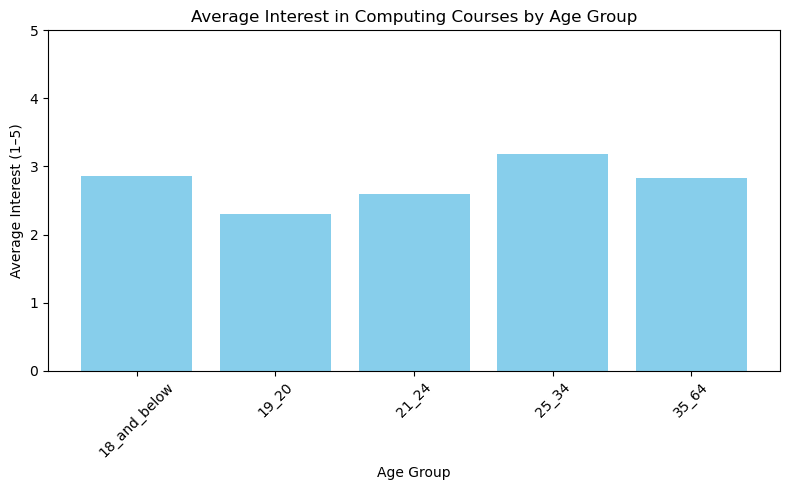

In [57]:
#Group by demographic and calculate average interest
avg_interest_by_age = survey.groupby('age')['interest_in_comp_courses'].mean().sort_index()
avg_interest_by_gender = survey.groupby('gender')['interest_in_comp_courses'].mean().sort_values(ascending=False)
avg_interest_by_race = survey.groupby('race')['interest_in_comp_courses'].mean().sort_values(ascending=False)

#Plot - Age
plt.figure(figsize=(8,5))
plt.bar(avg_interest_by_age.index, avg_interest_by_age.values, color='skyblue')
plt.title('Average Interest in Computing Courses by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Interest (1–5)')
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.tight_layout()
plt.show()


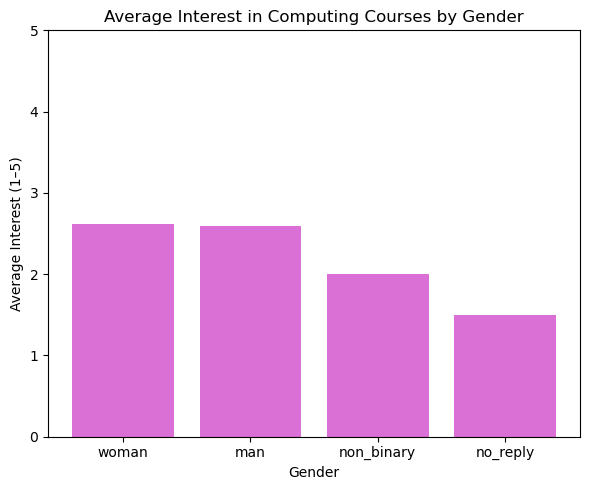

In [58]:
#Plot - Gender
plt.figure(figsize=(6,5))
plt.bar(avg_interest_by_gender.index, avg_interest_by_gender.values, color='orchid')
plt.title('Average Interest in Computing Courses by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Interest (1–5)')
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

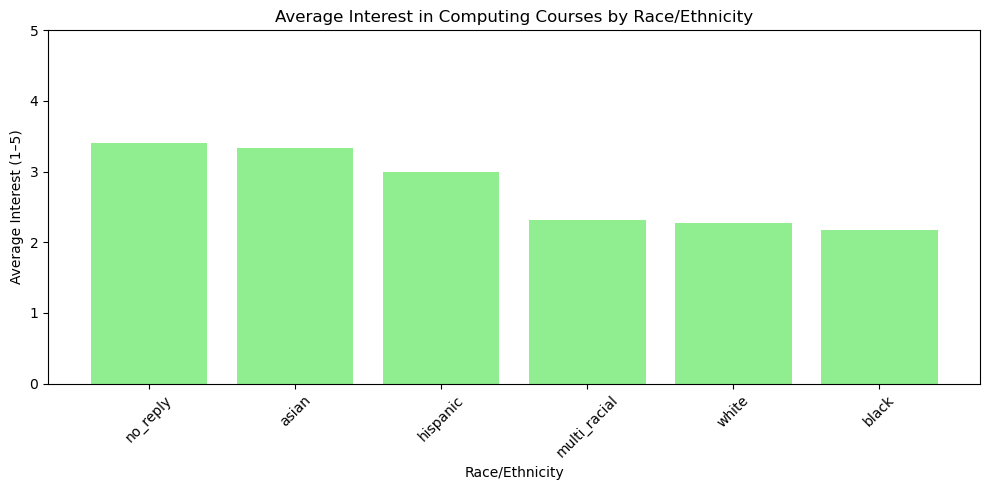

In [59]:
#Plot - Race/Ethnicity
plt.figure(figsize=(10,5))
plt.bar(avg_interest_by_race.index, avg_interest_by_race.values, color='lightgreen')
plt.title('Average Interest in Computing Courses by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Average Interest (1–5)')
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

## <u>Answer:</u> 25-34 year olds and Asians express the highest interest in taking more computing-related courses.
* Women and men express similar interest in taking more computing-related courses.
* Survey-takers who chose not to identify their race showed the most interest, slightly higher than Asians

## 3. Are certain outreach methods (open houses, virtual info sessions, etc.) more effective at influencing computing course enrollment for specific demographic groups?


### Plot by gender

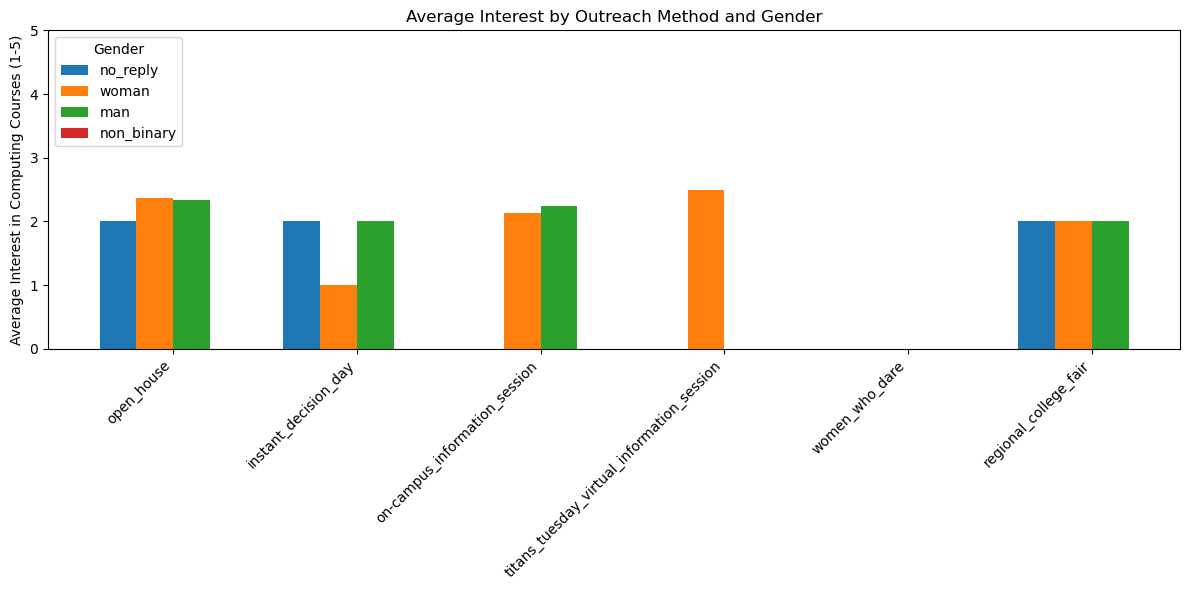

In [71]:
#Columns for outreach methods
outreach_cols = [
    'open_house',
    'instant_decision_day',
    'on-campus_information_session',
    'titans_tuesday_virtual_information_session',
    'women_who_dare',
    'regional_college_fair'
]

demographic_col = 'gender'  # or 'race'

#Get unique demographic groups
groups = survey[demographic_col].unique()

#Rows = outreach methods, cols = demographic groups
avg_interest = np.zeros((len(outreach_cols), len(groups)))

#Format (lowercase, strip) to make sure we catch 'yes'
for col in outreach_cols:
    survey[col] = survey[col].str.strip().str.lower()

#Calculate average interest_in_comp_courses per outreach and demographic group
for i, outreach in enumerate(outreach_cols):
    for j, group in enumerate(groups):
        # Filter students who said 'yes' to outreach and belong to demographic group
        filtered = survey[(survey[outreach] == 'yes') & (survey[demographic_col] == group)]
        if len(filtered) > 0:
            avg_interest[i, j] = filtered['interest_in_comp_courses'].mean()
        else:
            avg_interest[i, j] = np.nan  # or 0

#Plot grouped bar chart
fig, ax = plt.subplots(figsize=(12,6))

x = np.arange(len(outreach_cols))  #label locations
width = 0.8 / len(groups)  #width per bar

for j, group in enumerate(groups):
    ax.bar(x + j*width, avg_interest[:, j], width, label=group)

ax.set_xticks(x + width * (len(groups)-1)/2)
ax.set_xticklabels(outreach_cols, rotation=45, ha='right')
ax.set_ylim(0, 5)
ax.set_ylabel('Average Interest in Computing Courses (1-5)')
ax.set_title(f'Average Interest by Outreach Method and {demographic_col.capitalize()}')
ax.legend(title=demographic_col.capitalize())

plt.tight_layout()
plt.show()

### Plot by race

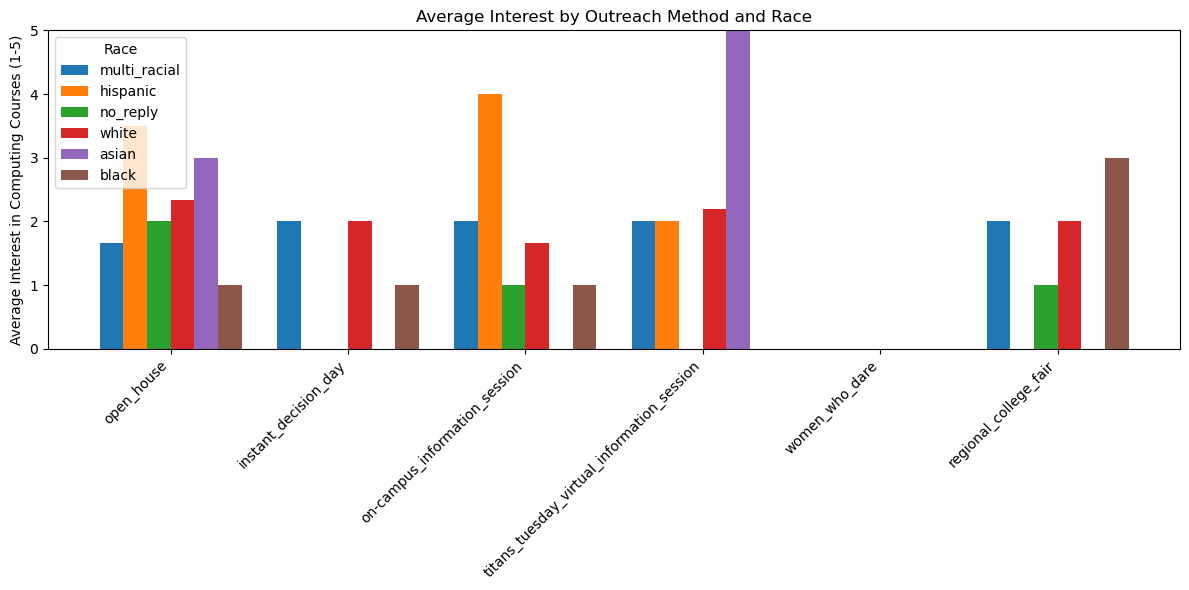

In [72]:
#Columns for outreach methods
outreach_cols = [
    'open_house',
    'instant_decision_day',
    'on-campus_information_session',
    'titans_tuesday_virtual_information_session',
    'women_who_dare',
    'regional_college_fair'
]

demographic_col = 'race'

#Get unique demographic groups
groups = survey[demographic_col].unique()

#Rows = outreach methods, cols = demographic groups
avg_interest = np.zeros((len(outreach_cols), len(groups)))

#Format (lowercase, strip) to make sure we catch 'yes'
for col in outreach_cols:
    survey[col] = survey[col].str.strip().str.lower()

#Calculate average interest_in_comp_courses per outreach and demographic group
for i, outreach in enumerate(outreach_cols):
    for j, group in enumerate(groups):
        # Filter students who said 'yes' to outreach and belong to demographic group
        filtered = survey[(survey[outreach] == 'yes') & (survey[demographic_col] == group)]
        if len(filtered) > 0:
            avg_interest[i, j] = filtered['interest_in_comp_courses'].mean()
        else:
            avg_interest[i, j] = np.nan  # or 0

#Plot grouped bar chart
fig, ax = plt.subplots(figsize=(12,6))

x = np.arange(len(outreach_cols))  #label locations
width = 0.8 / len(groups)  #width per bar

for j, group in enumerate(groups):
    ax.bar(x + j*width, avg_interest[:, j], width, label=group)

ax.set_xticks(x + width * (len(groups)-1)/2)
ax.set_xticklabels(outreach_cols, rotation=45, ha='right')
ax.set_ylim(0, 5)
ax.set_ylabel('Average Interest in Computing Courses (1-5)')
ax.set_title(f'Average Interest by Outreach Method and {demographic_col.capitalize()}')
ax.legend(title=demographic_col.capitalize())

plt.tight_layout()
plt.show()

### <u>Answer:</u> Yes, certain outreach methods (open houses, virtual info sessions, etc.) are more effective at influencing computing course enrollment for specific demographic groups.
* <b>Titan's Tuesday Virtual Information Session</b> is very effective at influencing computing course enrollment for <b>women and Asian stidents.</b>
* <b>On-campus information sessions and open house</b> events are very effective at influencing computing course enrollment for <b>Hispanic students.</b>
* <b>Regional college fairs</b> are effective at influencing enrollment for <b> black students.</b>

## 4.What types of computing topics (cybersecurity, data analytics, AI, etc.) are most appealing to different majors and demographic groups?

### Gender

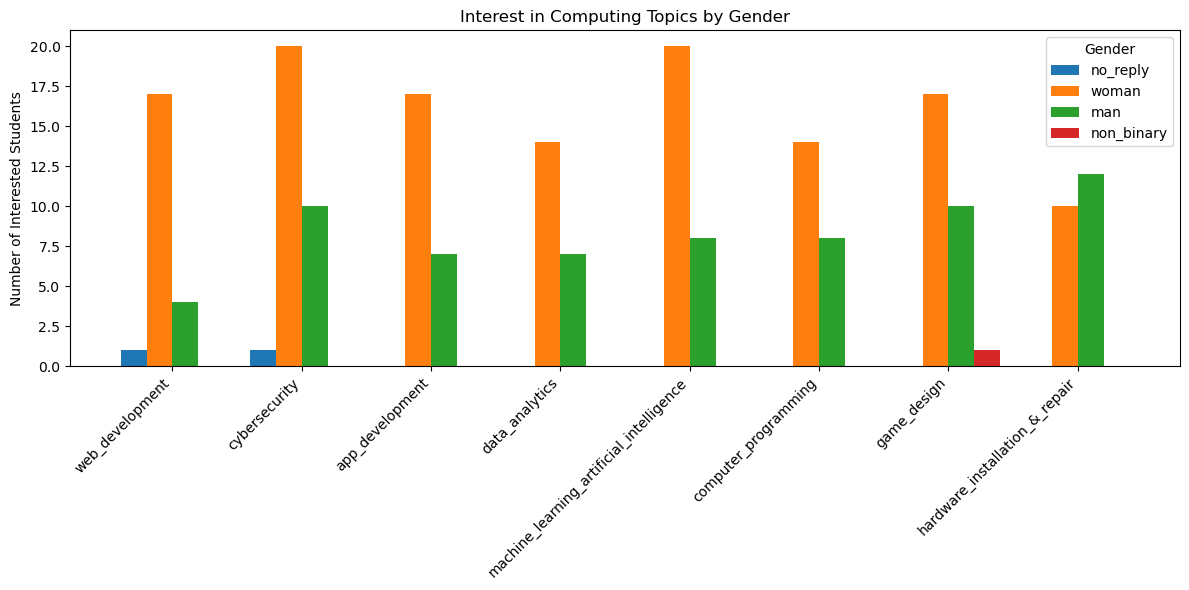

In [75]:
#Topic columns (37-44)
topics = [
    'web_development',
    'cybersecurity',
    'app_development',
    'data_analytics',
    'machine_learning_artificial_intelligence',
    'computer_programming',
    'game_design',
    'hardware_installation_&_repair'
]

#Demographic column to split by (can change to 'race' or 'current_major')
demographic_col = 'gender'

#Format yes/no to lowercase & strip spaces
for col in topics:
    survey[col] = survey[col].str.strip().str.lower()

# Get unique demographic groups (like woman, man, non_binary, etc.)
groups = survey[demographic_col].unique()

#Rows=topics, cols=groups
interest_counts = np.zeros((len(topics), len(groups)))

#Count how many "yes" in each topic for each demographic group
for i, topic in enumerate(topics):
    for j, group in enumerate(groups):
        filtered = survey[(survey[demographic_col] == group) & (survey[topic] == 'yes')]
        interest_counts[i, j] = len(filtered)

#Plot grouped bar chart
fig, ax = plt.subplots(figsize=(12,6))

x = np.arange(len(topics))  # label locations
width = 0.8 / len(groups)   # width of each bar

for j, group in enumerate(groups):
    ax.bar(x + j*width, interest_counts[:, j], width, label=group)

ax.set_xticks(x + width * (len(groups)-1)/2)
ax.set_xticklabels(topics, rotation=45, ha='right')
ax.set_ylabel('Number of Interested Students')
ax.set_title(f'Interest in Computing Topics by {demographic_col.capitalize()}')
ax.legend(title=demographic_col.capitalize())

plt.tight_layout()
plt.show()


### Race

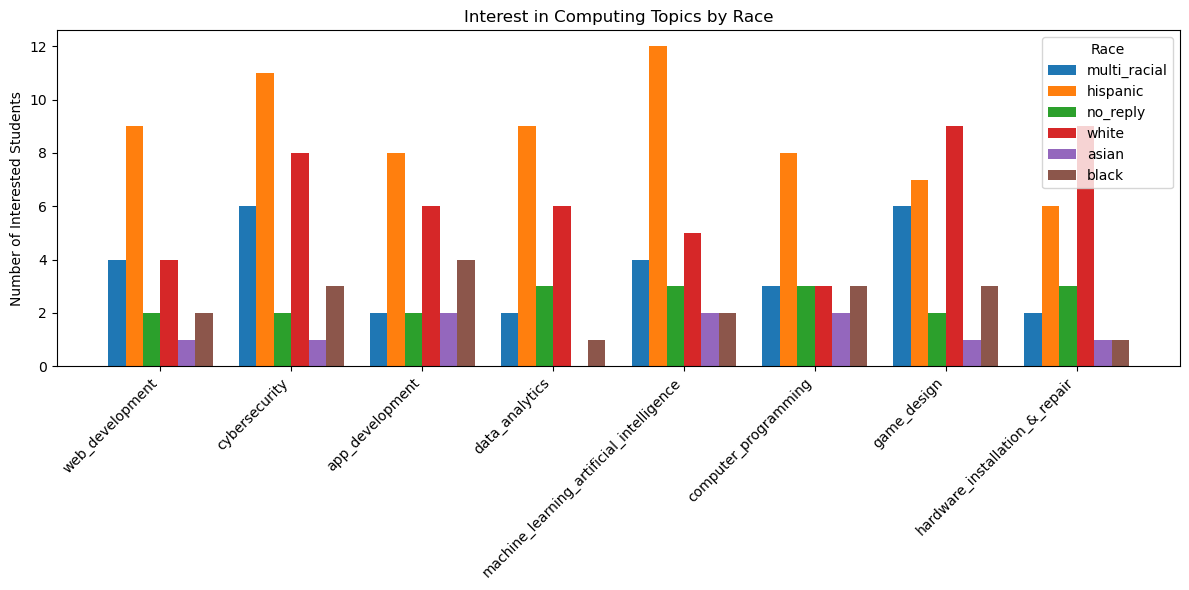

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Topic columns (37-44)
topics = [
    'web_development',
    'cybersecurity',
    'app_development',
    'data_analytics',
    'machine_learning_artificial_intelligence',
    'computer_programming',
    'game_design',
    'hardware_installation_&_repair'
]

# Demographic column to split by (can change to 'race' or 'current_major')
demographic_col = 'race'

# Normalize yes/no to lowercase & strip spaces
for col in topics:
    survey[col] = survey[col].str.strip().str.lower()

# Get unique demographic groups (like woman, man, non_binary, etc.)
groups = survey[demographic_col].unique()

# Initialize matrix: rows=topics, cols=groups
interest_counts = np.zeros((len(topics), len(groups)))

# Count how many "yes" in each topic for each demographic group
for i, topic in enumerate(topics):
    for j, group in enumerate(groups):
        filtered = survey[(survey[demographic_col] == group) & (survey[topic] == 'yes')]
        interest_counts[i, j] = len(filtered)

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(12,6))

x = np.arange(len(topics))  # label locations
width = 0.8 / len(groups)   # width of each bar

for j, group in enumerate(groups):
    ax.bar(x + j*width, interest_counts[:, j], width, label=group)

ax.set_xticks(x + width * (len(groups)-1)/2)
ax.set_xticklabels(topics, rotation=45, ha='right')
ax.set_ylabel('Number of Interested Students')
ax.set_title(f'Interest in Computing Topics by {demographic_col.capitalize()}')
ax.legend(title=demographic_col.capitalize())

plt.tight_layout()
plt.show()


### Age

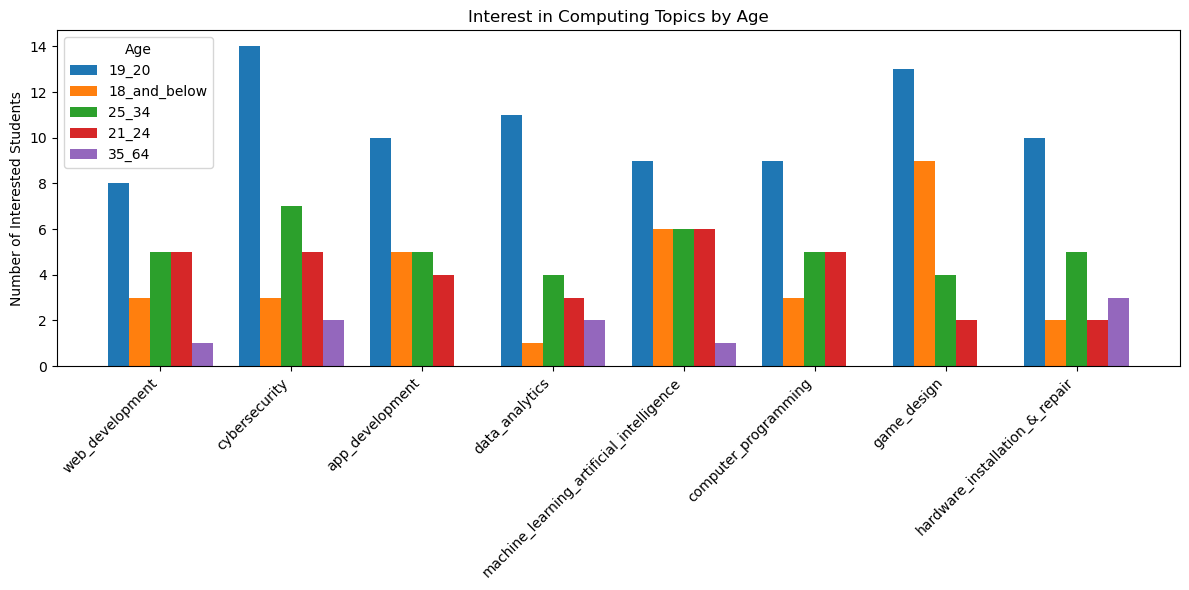

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Topic columns (37-44)
topics = [
    'web_development',
    'cybersecurity',
    'app_development',
    'data_analytics',
    'machine_learning_artificial_intelligence',
    'computer_programming',
    'game_design',
    'hardware_installation_&_repair'
]

# Demographic column to split by (can change to 'race' or 'current_major')
demographic_col = 'age'

# Normalize yes/no to lowercase & strip spaces
for col in topics:
    survey[col] = survey[col].str.strip().str.lower()

# Get unique demographic groups (like woman, man, non_binary, etc.)
groups = survey[demographic_col].unique()

# Initialize matrix: rows=topics, cols=groups
interest_counts = np.zeros((len(topics), len(groups)))

# Count how many "yes" in each topic for each demographic group
for i, topic in enumerate(topics):
    for j, group in enumerate(groups):
        filtered = survey[(survey[demographic_col] == group) & (survey[topic] == 'yes')]
        interest_counts[i, j] = len(filtered)

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(12,6))

x = np.arange(len(topics))  # label locations
width = 0.8 / len(groups)   # width of each bar

for j, group in enumerate(groups):
    ax.bar(x + j*width, interest_counts[:, j], width, label=group)

ax.set_xticks(x + width * (len(groups)-1)/2)
ax.set_xticklabels(topics, rotation=45, ha='right')
ax.set_ylabel('Number of Interested Students')
ax.set_title(f'Interest in Computing Topics by {demographic_col.capitalize()}')
ax.legend(title=demographic_col.capitalize())

plt.tight_layout()
plt.show()


## <u>Answer:</u>
* Cybersecurity is most appealing to students between the ages of 19-20 and 25-34.
* Machine Learning and Artificial Intelligence is appealing to ages below 18 up to 34 and Hispanic students.
* Hardware Installation and Repair is most appealing to white students.
* Women consistently show dramatically higher interest across all courses, except for Hardware Installation, compared to men.

### End of file